In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
import seaborn as sns

In [73]:
# import data
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [74]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [75]:
# data features
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [76]:
data = pd.DataFrame(cancer_data.data,columns = cancer_data.feature_names)

In [77]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- When the features are merged to less number of features, all the features should be standardized to a scaler and then they can be correctly merged.

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [80]:
# standerdizing data
scaled_data = scaler.transform(data)

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components=2)

- The features will be merged to generate 2 new features, one can decide any number od features the want to generate. It depends on data and model function.

In [83]:
# applying PCA on data, the dimensionality of the data is reduced.
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [84]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'Second component')

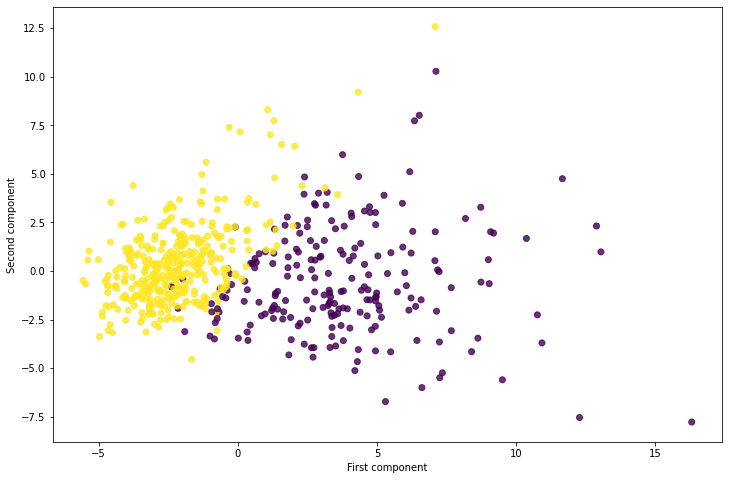

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(pca_data[:,0],pca_data[:,1],c=cancer_data.target,alpha=0.8)
plt.xlabel("First component")
plt.ylabel("Second component")

- We can see that the new features can clearly separate the data for give target feature, so this is a good example of dimensionality reduction.